In [1]:
!pip install tensorflow

  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [3]:
train_path = 'E:/Covid19-dataset/train'
valid_path = 'E:/Covid19-dataset/valid'
test_path = 'E:/Covid19-dataset/test'

In [4]:
train_set=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(150,150), classes=['Covid','Normal','Viral Pneumonia'],batch_size=20)
valid_set=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(150,150), classes=['Covid','Normal','Viral Pneumonia'],batch_size=20)
test_set=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(150,150), classes=['Covid','Normal','Viral Pneumonia'],batch_size=20, shuffle = False) 

Found 214 images belonging to 3 classes.
Found 41 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [5]:
images, targets = next(train_set)

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for imgs,x in zip(images_arr,axes):
        x.imshow(imgs)
        x.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

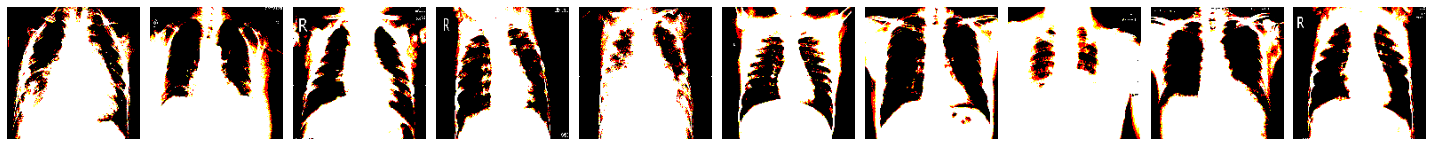

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [7]:
plotImages(images)
print(targets)

In [8]:
#CNN Model Build

cnn_model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (150,150,3)),
    MaxPool2D(pool_size = (2,2), strides=2),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides=2),
    Flatten(),
    Dense(units=3, activation = 'softmax'),
])

In [9]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 3)                 2

In [11]:
#Model Fitting

cnn_model.compile(optimizer = Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [12]:
cnn_model.fit(x = train_set, validation_data = valid_set, epochs = 2, verbose = 2)

Epoch 1/2
11/11 - 17s - loss: 12.8525 - accuracy: 0.5607 - val_loss: 3.9062 - val_accuracy: 0.8293 - 17s/epoch - 2s/step
Epoch 2/2
11/11 - 11s - loss: 2.4616 - accuracy: 0.9019 - val_loss: 5.1930 - val_accuracy: 0.8049 - 11s/epoch - 986ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

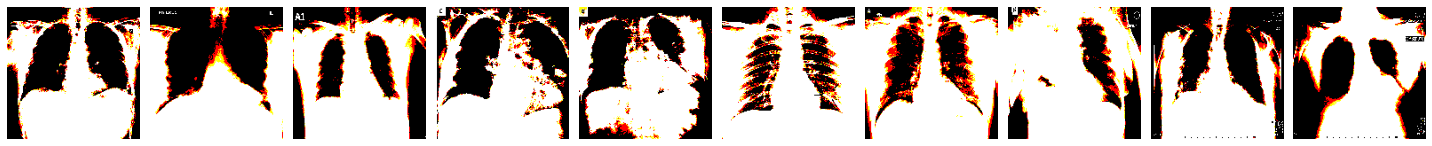

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [13]:
#Prediction

timages, ttarget = next(test_set)
plotImages(timages)
print(ttarget)

In [14]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
cnnmodel_predict = cnn_model.predict(x = test_set, verbose = 0)

In [16]:
np.round(cnnmodel_predict)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0

In [17]:
#cm = confusion_matrix(y_true = test_set.classes, y_pred = np.argmax(cnnmodel_predict, axis = -1))  

cm = confusion_matrix(y_true=test_set.classes, y_pred=np.argmax(cnnmodel_predict, axis=-1))

In [18]:
#Confusion Matrix class form scikit-learn documentation
#https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
test_set.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

Confusion matrix, without normalization
[[22  3  1]
 [ 0  6 14]
 [ 0  1 19]]


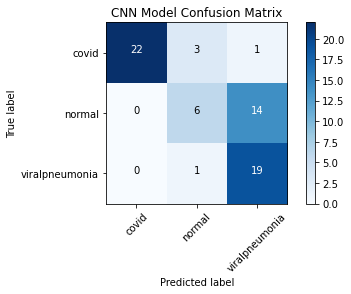

In [20]:
cm_plot_labels = ['covid', 'normal', 'viralpneumonia']
plot_confusion_matrix(cm = cm, classes=cm_plot_labels, title="CNN Model Confusion Matrix")

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [22]:
cnn_accuracy=accuracy_score(y_true=test_set.classes, y_pred=np.argmax(cnnmodel_predict, axis=-1))
cnn_recall=recall_score(y_true=test_set.classes, y_pred=np.argmax(cnnmodel_predict, axis=-1), average = 'micro')
cnn_precision=precision_score(y_true=test_set.classes, y_pred=np.argmax(cnnmodel_predict, axis=-1), average = 'micro')
cnn_f1=f1_score(y_true=test_set.classes, y_pred=np.argmax(cnnmodel_predict, axis=-1), average = 'micro')
print(cnn_accuracy)
print(cnn_recall)
print(cnn_precision)
print(cnn_f1)

0.7121212121212122
0.7121212121212122
0.7121212121212122
0.7121212121212122


In [23]:
#VGG16
vgg16_model = Sequential()

pretrained_model= tf.keras.applications.vgg16.VGG16(include_top=False,
                   input_shape=None,
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

vgg16_model.add(pretrained_model)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(3, activation='softmax'))

vgg16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 14,716,227
Trainable params: 1,539
Non-trainable params: 14,714,688
_________________________________________________________________


In [24]:
vgg16_model.compile(optimizer = Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [25]:
vgg16_model.fit(x = train_set, validation_data = valid_set, epochs = 2, verbose = 2)

Epoch 1/2
11/11 - 35s - loss: 4.8863 - accuracy: 0.2897 - val_loss: 5.1464 - val_accuracy: 0.2683 - 35s/epoch - 3s/step
Epoch 2/2
11/11 - 27s - loss: 4.3841 - accuracy: 0.2991 - val_loss: 4.8719 - val_accuracy: 0.3171 - 27s/epoch - 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

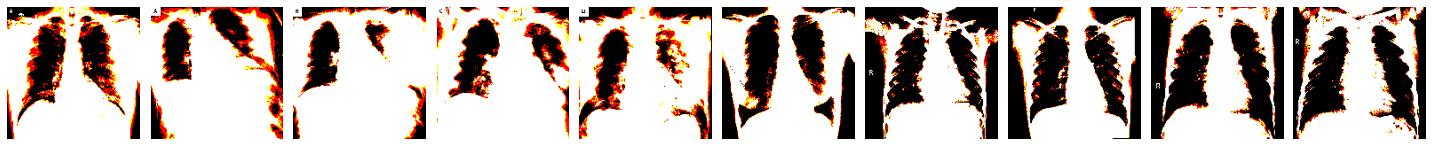

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [26]:
#Prediction
vgg16_images, vgg16_target = next(test_set)
plotImages(vgg16_images)
print(vgg16_target)

In [54]:
vgg16_predict = vgg16_model.predict(x = test_set, verbose = 0)

In [55]:
np.round(vgg16_predict)

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

Confusion matrix, without normalization
[[13 11  2]
 [15  4  1]
 [ 0  0  0]]


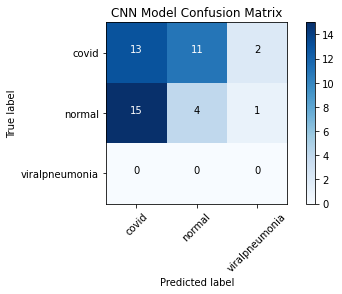

In [57]:
cm = confusion_matrix(y_true=test_set.classes, y_pred=np.argmax(vgg16_predict, axis=-1))
cm_plot_labels = ['covid', 'normal', 'viralpneumonia']
plot_confusion_matrix(cm = cm, classes=cm_plot_labels, title="CNN Model Confusion Matrix")

In [58]:
vgg16_accuracy=accuracy_score(y_true=test_set.classes, y_pred=np.argmax(vgg16_predict, axis=-1))
vgg16_recall=recall_score(y_true=test_set.classes, y_pred=np.argmax(vgg16_predict, axis=-1), average = 'micro')
vgg16_precision=precision_score(y_true=test_set.classes, y_pred=np.argmax(vgg16_predict, axis=-1), average = 'micro')
vgg16_f1=f1_score(y_true=test_set.classes, y_pred=np.argmax(vgg16_predict, axis=-1), average = 'micro')
print(vgg16_accuracy)
print(vgg16_recall)
print(vgg16_precision)
print(vgg16_f1)

0.3695652173913043
0.3695652173913043
0.3695652173913043
0.36956521739130427


In [59]:
#DenseNet

train_set=ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(150,150), classes=['covid','normal','viralpneumonia'],batch_size=20)
valid_set=ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(150,150), classes=['covid','normal','viralpneumonia'],batch_size=20)
test_set=ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(150,150), classes=['covid','normal','viralpneumonia'],batch_size=20, shuffle = False) 

Found 153 images belonging to 3 classes.
Found 28 images belonging to 3 classes.
Found 46 images belonging to 3 classes.


In [60]:
#DenseNet121
densenet121_model = Sequential()
pretrained_densenet121_model=tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(150,150,3),
    pooling='avg',
    classes=3,
)

for layer in pretrained_densenet121_model.layers:
        layer.trainable=False
        
densenet121_model.add(pretrained_densenet121_model)
densenet121_model.add(Flatten())
densenet121_model.add(Dense(3, activation='softmax'))

densenet121_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 7,040,579
Trainable params: 3,075
Non-trainable params: 7,037,504
_________________________________________________________________


In [61]:
densenet121_model.compile(optimizer = Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [62]:
densenet121_model.fit(x = train_set, validation_data = valid_set, epochs = 10, verbose = 2)

Epoch 1/10
8/8 - 26s - loss: 4.9598 - accuracy: 0.3725 - val_loss: 3.8178 - val_accuracy: 0.4643 - 26s/epoch - 3s/step
Epoch 2/10
8/8 - 17s - loss: 4.2747 - accuracy: 0.3725 - val_loss: 3.2402 - val_accuracy: 0.4643 - 17s/epoch - 2s/step
Epoch 3/10
8/8 - 17s - loss: 3.5819 - accuracy: 0.3725 - val_loss: 2.6692 - val_accuracy: 0.4643 - 17s/epoch - 2s/step
Epoch 4/10
8/8 - 20s - loss: 2.8869 - accuracy: 0.3791 - val_loss: 2.1213 - val_accuracy: 0.4643 - 20s/epoch - 3s/step
Epoch 5/10
8/8 - 21s - loss: 2.2489 - accuracy: 0.4052 - val_loss: 1.6123 - val_accuracy: 0.5000 - 21s/epoch - 3s/step
Epoch 6/10
8/8 - 19s - loss: 1.6837 - accuracy: 0.4444 - val_loss: 1.1806 - val_accuracy: 0.6071 - 19s/epoch - 2s/step
Epoch 7/10
8/8 - 18s - loss: 1.2097 - accuracy: 0.5229 - val_loss: 0.8562 - val_accuracy: 0.6786 - 18s/epoch - 2s/step
Epoch 8/10
8/8 - 16s - loss: 0.8411 - accuracy: 0.6144 - val_loss: 0.6544 - val_accuracy: 0.7857 - 16s/epoch - 2s/step
Epoch 9/10
8/8 - 18s - loss: 0.6286 - accuracy: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

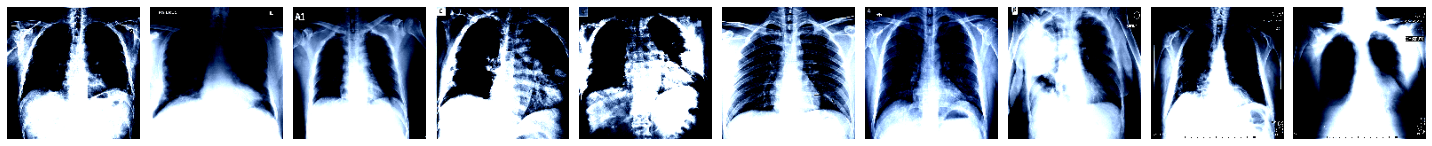

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [63]:
#Prediction
densenet121_images, densenet121_target = next(test_set)
plotImages(densenet121_images)
print(densenet121_target)

In [64]:
densenet121_predict = densenet121_model.predict(x = test_set, verbose = 0)

In [65]:
np.round(densenet121_predict)

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

Confusion matrix, without normalization
[[19  7]
 [ 9 11]]


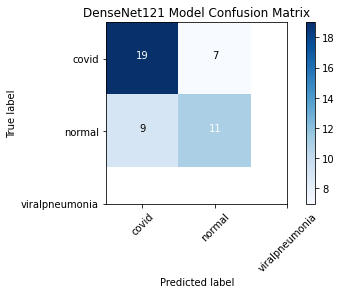

In [66]:
cm = confusion_matrix(y_true=test_set.classes, y_pred=np.argmax(densenet121_predict, axis=-1))
cm_plot_labels = ['covid', 'normal', 'viralpneumonia']
plot_confusion_matrix(cm = cm, classes=cm_plot_labels, title="DenseNet121 Model Confusion Matrix")

In [68]:
densenet121_accuracy=accuracy_score(y_true=test_set.classes, y_pred=np.argmax(densenet121_predict, axis=-1))
densenet121_recall=recall_score(y_true=test_set.classes, y_pred=np.argmax(densenet121_predict, axis=-1), average = 'micro')
densenet121_precision=precision_score(y_true=test_set.classes, y_pred=np.argmax(densenet121_predict, axis=-1), average = 'micro')
densenet121_f1=f1_score(y_true=test_set.classes, y_pred=np.argmax(densenet121_predict, axis=-1), average = 'micro')
print(densenet121_accuracy)
print(densenet121_recall)
print(densenet121_precision)
print(densenet121_f1)

0.6521739130434783
0.6521739130434783
0.6521739130434783
0.6521739130434783


In [69]:
#DenseNet169
densenet169_model=Sequential()
pretrained_densenet169_model=tf.keras.applications.DenseNet169(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(150,150,3),
    pooling=None,
    classes=3,
)
for layer in pretrained_densenet169_model.layers:
        layer.trainable=False
        
densenet169_model.add(pretrained_densenet169_model)
densenet169_model.add(Flatten())
densenet169_model.add(Dense(3, activation='softmax'))

densenet169_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 4, 4, 1664)        12642880  
                                                                 
 flatten_4 (Flatten)         (None, 26624)             0         
                                                                 
 dense_4 (Dense)             (None, 3)                 79875     
                                                                 
Total params: 12,722,755
Trainable params: 79,875
Non-trainable params: 12,642,880
_________________________________________________________________


In [70]:
densenet169_model.compile(optimizer = Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [71]:
densenet169_model.fit(x = train_set, validation_data = valid_set, epochs = 10, verbose = 2)

Epoch 1/10
8/8 - 23s - loss: 0.7181 - accuracy: 0.6863 - val_loss: 0.3188 - val_accuracy: 0.9286 - 23s/epoch - 3s/step
Epoch 2/10
8/8 - 15s - loss: 0.1888 - accuracy: 0.9346 - val_loss: 0.1826 - val_accuracy: 0.9643 - 15s/epoch - 2s/step
Epoch 3/10
8/8 - 15s - loss: 0.0989 - accuracy: 0.9739 - val_loss: 0.1241 - val_accuracy: 0.9643 - 15s/epoch - 2s/step
Epoch 4/10
8/8 - 15s - loss: 0.0441 - accuracy: 0.9869 - val_loss: 0.1515 - val_accuracy: 0.9643 - 15s/epoch - 2s/step
Epoch 5/10
8/8 - 15s - loss: 0.0362 - accuracy: 0.9935 - val_loss: 0.1351 - val_accuracy: 0.9643 - 15s/epoch - 2s/step
Epoch 6/10
8/8 - 15s - loss: 0.0218 - accuracy: 1.0000 - val_loss: 0.0900 - val_accuracy: 0.9643 - 15s/epoch - 2s/step
Epoch 7/10
8/8 - 15s - loss: 0.0213 - accuracy: 0.9869 - val_loss: 0.0754 - val_accuracy: 0.9643 - 15s/epoch - 2s/step
Epoch 8/10
8/8 - 16s - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.1071 - val_accuracy: 0.9643 - 16s/epoch - 2s/step
Epoch 9/10
8/8 - 17s - loss: 0.0130 - accuracy: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

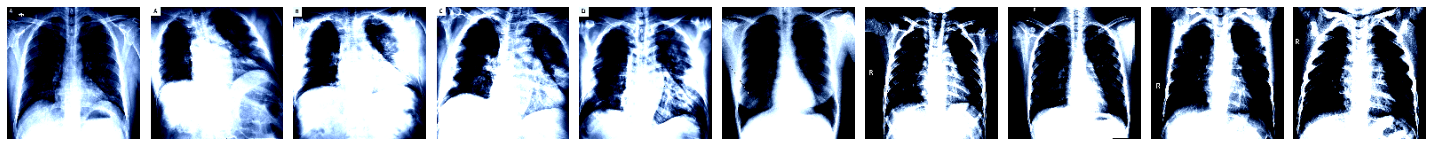

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [72]:
#Prediction
densenet169_images, densenet169_target = next(test_set)
plotImages(densenet169_images)
print(densenet169_target)

In [73]:
densenet169_predict = densenet169_model.predict(x = test_set, verbose = 3)

In [74]:
np.round(densenet169_predict)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

Confusion matrix, without normalization
[[26  0]
 [ 0 20]]


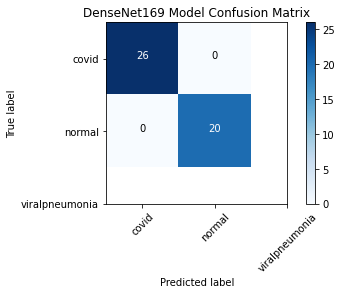

In [75]:
cm = confusion_matrix(y_true=test_set.classes, y_pred=np.argmax(densenet169_predict, axis=-1))
cm_plot_labels = ['covid', 'normal', 'viralpneumonia']
plot_confusion_matrix(cm = cm, classes=cm_plot_labels, title="DenseNet169 Model Confusion Matrix")

In [76]:
densenet169_accuracy=accuracy_score(y_true=test_set.classes, y_pred=np.argmax(densenet169_predict, axis=-1))
densenet169_recall=recall_score(y_true=test_set.classes, y_pred=np.argmax(densenet169_predict, axis=-1), average = 'micro')
densenet169_precision=precision_score(y_true=test_set.classes, y_pred=np.argmax(densenet169_predict, axis=-1), average = 'micro')
densenet169_f1=f1_score(y_true=test_set.classes, y_pred=np.argmax(densenet169_predict, axis=-1), average = 'micro')
print(densenet169_accuracy)
print(densenet169_recall)
print(densenet169_precision)
print(densenet169_f1)

1.0
1.0
1.0
1.0


In [77]:
#DenseNet201

densenet201_model=Sequential()
pretrained_densenet201_model=tf.keras.applications.DenseNet201(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(150,150,3),
    pooling=None,
    classes=3,
)
for layer in pretrained_densenet201_model.layers:
        layer.trainable=False
        
densenet201_model.add(pretrained_densenet201_model)
densenet201_model.add(Flatten())
densenet201_model.add(Dense(3, activation='softmax'))

densenet201_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 4, 4, 1920)        18321984  
                                                                 
 flatten_5 (Flatten)         (None, 30720)             0         
                                                                 
 dense_5 (Dense)             (None, 3)                 92163     
                                                                 
Total params: 18,414,147
Trainable params: 92,163
Non-trainable params: 18,321,984
_________________________________________________________________


In [78]:
densenet201_model.compile(optimizer = Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [79]:
densenet201_model.fit(x = train_set, validation_data = valid_set, epochs = 10, verbose = 2)

Epoch 1/10
8/8 - 30s - loss: 0.5612 - accuracy: 0.7451 - val_loss: 0.4409 - val_accuracy: 0.7857 - 30s/epoch - 4s/step
Epoch 2/10
8/8 - 17s - loss: 0.1738 - accuracy: 0.9281 - val_loss: 0.1353 - val_accuracy: 0.9286 - 17s/epoch - 2s/step
Epoch 3/10
8/8 - 17s - loss: 0.0609 - accuracy: 0.9804 - val_loss: 0.0767 - val_accuracy: 0.9643 - 17s/epoch - 2s/step
Epoch 4/10
8/8 - 18s - loss: 0.0472 - accuracy: 0.9869 - val_loss: 0.0620 - val_accuracy: 1.0000 - 18s/epoch - 2s/step
Epoch 5/10
8/8 - 19s - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.0630 - val_accuracy: 1.0000 - 19s/epoch - 2s/step
Epoch 6/10
8/8 - 18s - loss: 0.0196 - accuracy: 1.0000 - val_loss: 0.0491 - val_accuracy: 1.0000 - 18s/epoch - 2s/step
Epoch 7/10
8/8 - 21s - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0383 - val_accuracy: 1.0000 - 21s/epoch - 3s/step
Epoch 8/10
8/8 - 24s - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0355 - val_accuracy: 1.0000 - 24s/epoch - 3s/step
Epoch 9/10
8/8 - 24s - loss: 0.0094 - accuracy: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


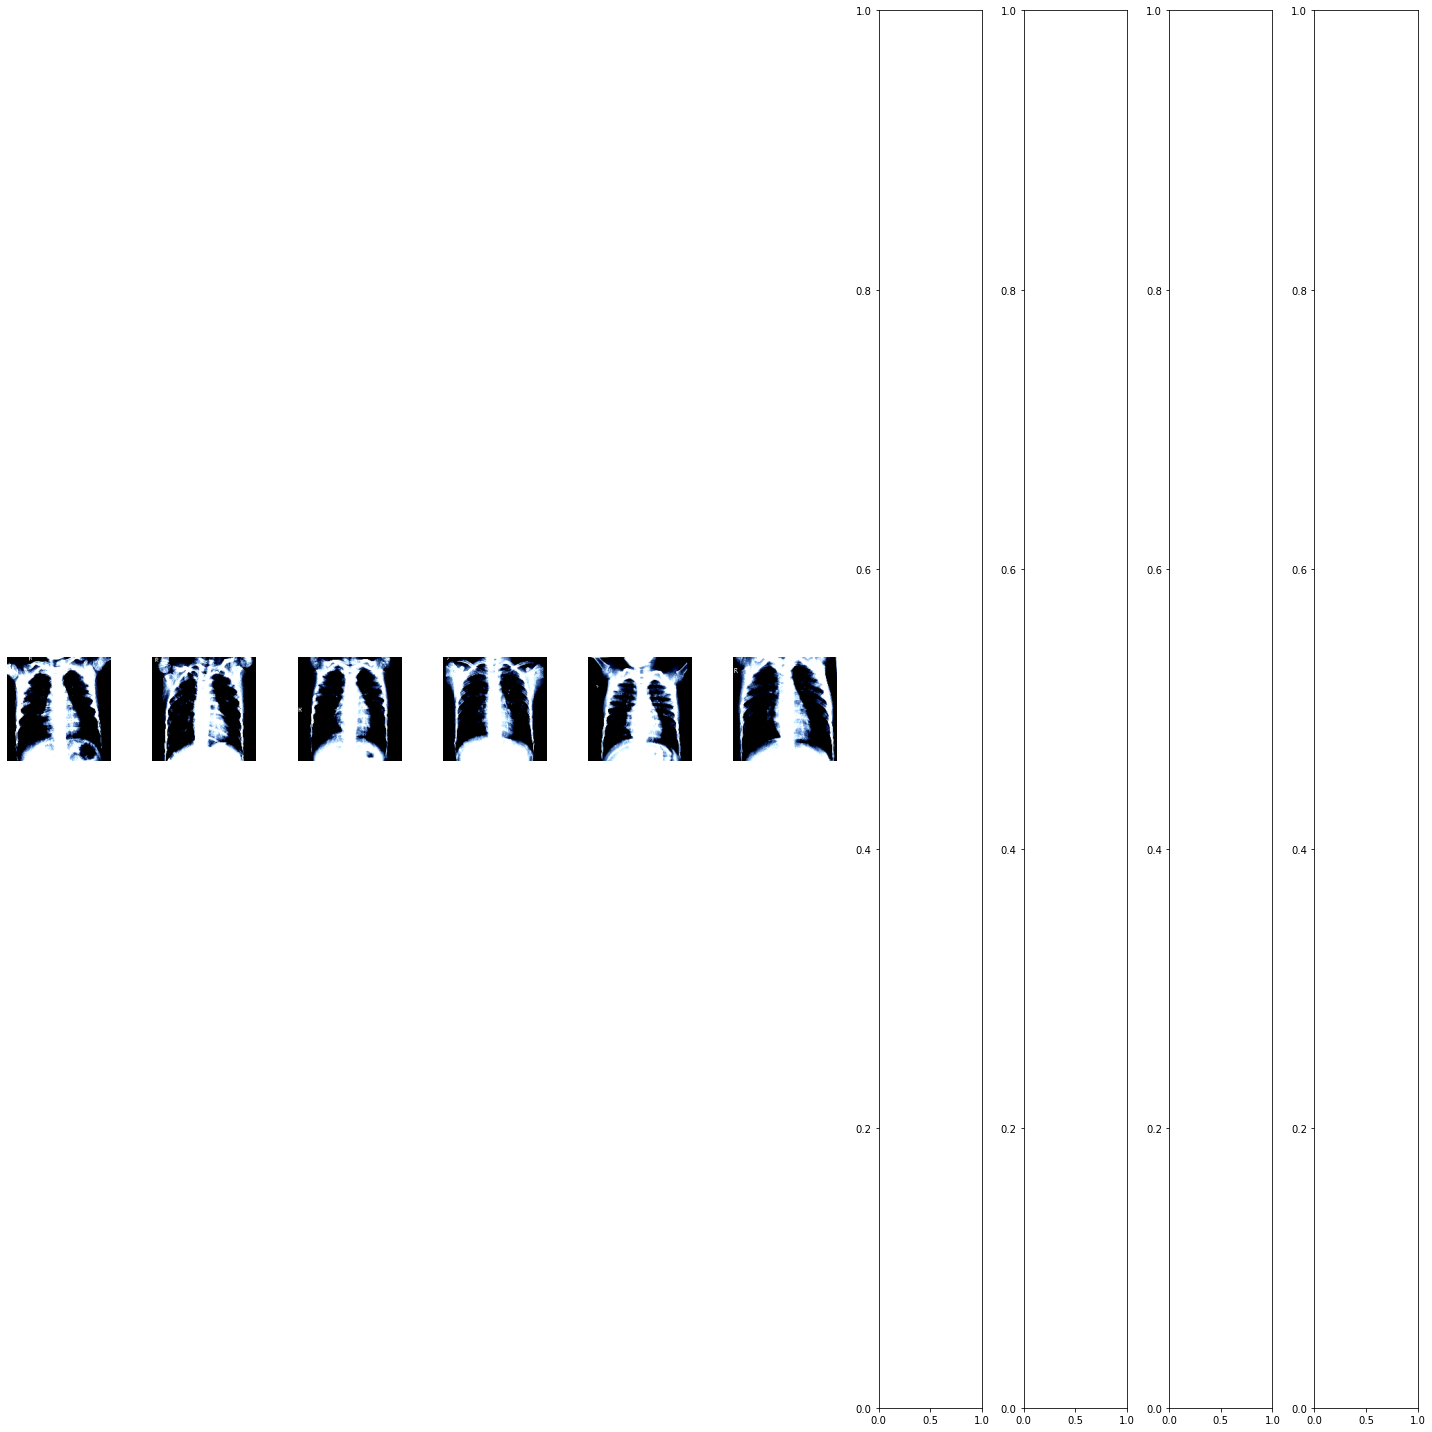

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [80]:
#Prediction
densenet201_images, densenet201_target = next(test_set)
plotImages(densenet201_images)
print(densenet201_target)

In [81]:
densenet201_predict = densenet201_model.predict(x = test_set, verbose = 3)

In [82]:
np.round(densenet201_predict)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

Confusion matrix, without normalization
[[26  0]
 [ 0 20]]


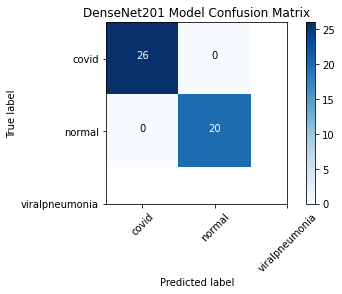

In [83]:
cm = confusion_matrix(y_true=test_set.classes, y_pred=np.argmax(densenet201_predict, axis=-1))
cm_plot_labels = ['covid', 'normal', 'viralpneumonia']
plot_confusion_matrix(cm = cm, classes=cm_plot_labels, title="DenseNet201 Model Confusion Matrix")

In [84]:
densenet201_accuracy=accuracy_score(y_true=test_set.classes, y_pred=np.argmax(densenet201_predict, axis=-1))
densenet201_recall=recall_score(y_true=test_set.classes, y_pred=np.argmax(densenet201_predict, axis=-1), average = 'micro')
densenet201_precision=precision_score(y_true=test_set.classes, y_pred=np.argmax(densenet201_predict, axis=-1), average = 'micro')
densenet201_f1=f1_score(y_true=test_set.classes, y_pred=np.argmax(densenet201_predict, axis=-1), average = 'micro')
print(densenet201_accuracy)
print(densenet201_recall)
print(densenet201_precision)
print(densenet201_f1)

1.0
1.0
1.0
1.0


In [85]:
#ResNet

train_set=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input).flow_from_directory(directory=train_path, target_size=(150,150), classes=['covid','normal','viralpneumonia'],batch_size=20)
valid_set=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(150,150), classes=['covid','normal','viralpneumonia'],batch_size=20)
test_set=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input).flow_from_directory(directory=test_path, target_size=(150,150), classes=['covid','normal','viralpneumonia'],batch_size=20, shuffle = False) 


Found 153 images belonging to 3 classes.
Found 28 images belonging to 3 classes.
Found 46 images belonging to 3 classes.


In [86]:
#ResNet50

resnet50_model=Sequential()
pretrained_resnet50_model=tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(150,150,3),
    pooling=None,
    classes=3,
    
)
for layer in pretrained_resnet50_model.layers:
        layer.trainable=False
        
resnet50_model.add(pretrained_resnet50_model)
resnet50_model.add(Flatten())
resnet50_model.add(Dense(3, activation='softmax'))

resnet50_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 51200)             0         
                                                                 
 dense_6 (Dense)             (None, 3)                 153603    
                                                                 
Total params: 23,741,315
Trainable params: 153,603
Non-trainable params: 23,587,712
_________________________________________________________________


In [87]:
resnet50_model.compile(optimizer = Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [88]:
history=resnet50_model.fit(x = train_set, validation_data = valid_set, epochs = 3, verbose = 2)

Epoch 1/3
8/8 - 20s - loss: 0.8048 - accuracy: 0.7647 - val_loss: 0.0212 - val_accuracy: 1.0000 - 20s/epoch - 3s/step
Epoch 2/3
8/8 - 17s - loss: 0.1061 - accuracy: 0.9542 - val_loss: 0.0498 - val_accuracy: 1.0000 - 17s/epoch - 2s/step
Epoch 3/3
8/8 - 19s - loss: 0.0353 - accuracy: 0.9935 - val_loss: 0.0041 - val_accuracy: 1.0000 - 19s/epoch - 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

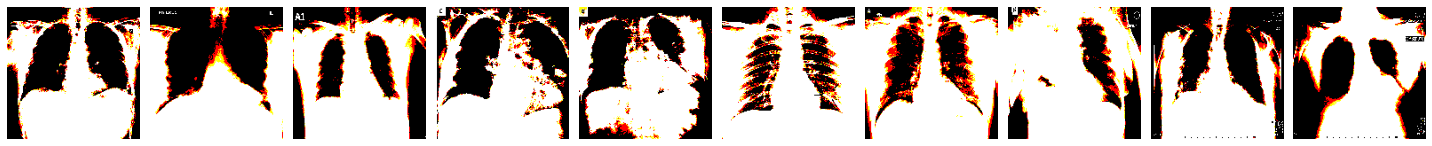

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [89]:
#Prediction
resnet50_images, resnet50_target = next(test_set)
plotImages(resnet50_images)
print(resnet50_target)

In [90]:
resnet50_predict = resnet50_model.predict(x = test_set, verbose = 3)

In [91]:
np.round(resnet50_predict)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

Confusion matrix, without normalization
[[26  0]
 [ 0 20]]


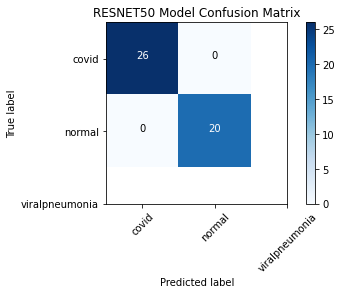

In [92]:
cm = confusion_matrix(y_true=test_set.classes, y_pred=np.argmax(resnet50_predict, axis=-1))
cm_plot_labels = ['covid', 'normal', 'viralpneumonia']
plot_confusion_matrix(cm = cm, classes=cm_plot_labels, title="RESNET50 Model Confusion Matrix")

In [93]:
resnet50_accuracy=accuracy_score(y_true=test_set.classes, y_pred=np.argmax(densenet201_predict, axis=-1))
resnet50_recall=print(recall_score(y_true=test_set.classes, y_pred=np.argmax(densenet201_predict, axis=-1), average = 'micro'))
resnet50_precision=print(precision_score(y_true=test_set.classes, y_pred=np.argmax(densenet201_predict, axis=-1), average = 'micro'))
resnet50_f1=print(f1_score(y_true=test_set.classes, y_pred=np.argmax(densenet201_predict, axis=-1), average = 'micro'))
print(resnet50_accuracy)
print(resnet50_recall)
print(resnet50_precision)
print(resnet50_f1)

1.0
1.0
1.0
1.0
None
None
None


In [94]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


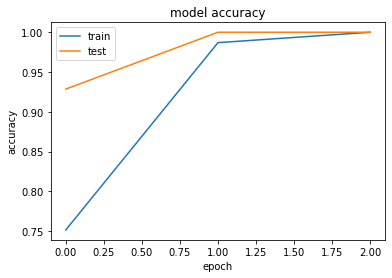

In [157]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

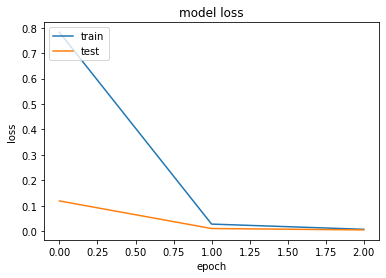

In [158]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'Comparison of Keras Networks')

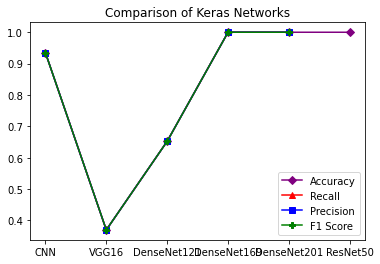

In [95]:
########   COMPARISON   ########

plt.plot(['CNN','VGG16','DenseNet121','DenseNet169','DenseNet201','ResNet50'],[cnn_accuracy, vgg16_accuracy, densenet121_accuracy, densenet169_accuracy, densenet201_accuracy, resnet50_accuracy],color='purple',marker='D')
plt.plot(['CNN','VGG16','DenseNet121','DenseNet169','DenseNet201','ResNet50'],[cnn_recall, vgg16_recall, densenet121_recall, densenet169_recall, densenet201_recall, resnet50_recall],color='red',marker='^')
plt.plot(['CNN','VGG16','DenseNet121','DenseNet169','DenseNet201','ResNet50'],[cnn_precision, vgg16_precision, densenet121_precision, densenet169_precision, densenet201_precision, resnet50_precision],color='blue',marker='s')
plt.plot(['CNN','VGG16','DenseNet121','DenseNet169','DenseNet201','ResNet50'],[cnn_f1, vgg16_f1, densenet121_f1, densenet169_f1, densenet201_f1, resnet50_f1],color='green',marker='P')
plt.legend(('Accuracy','Recall','Precision','F1 Score'))
plt.title('Comparison of Keras Networks')

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

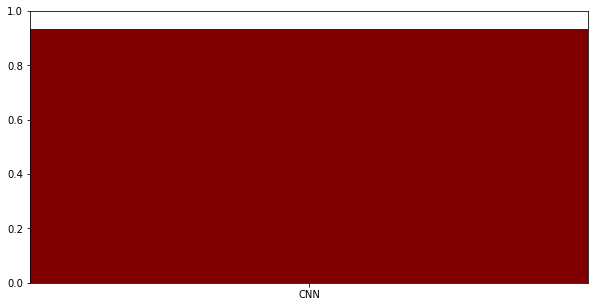

In [99]:
a=['CNN','VGG16','DenseNet121','DenseNet169','DenseNet201','ResNet50']
b=[cnn_f1, vgg16_f1, densenet121_f1, densenet169_f1, densenet201_f1, resnet50_f1]
fig = plt.figure(figsize = (10, 5))

plt.bar(a,b, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Keras Networks")
plt.show()

In [100]:
import matplotlib.pyplot as plt


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

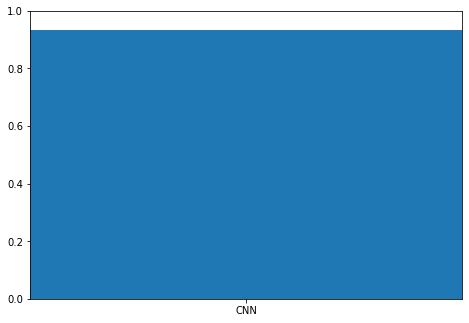

In [102]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
a=['CNN','VGG16','DenseNet121','DenseNet169','DenseNet201','ResNet50']
b=[cnn_f1, vgg16_f1, densenet121_f1, densenet169_f1, densenet201_f1, resnet50_f1]
ax.bar(a,b)
plt.show()